washing time:  13.440476190476192


C:\Users\Divya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Divya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Divya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Divya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Divya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

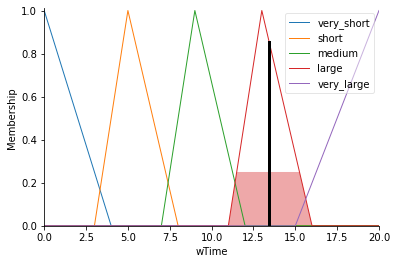

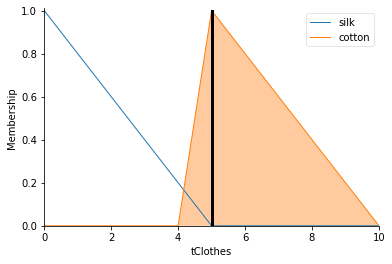

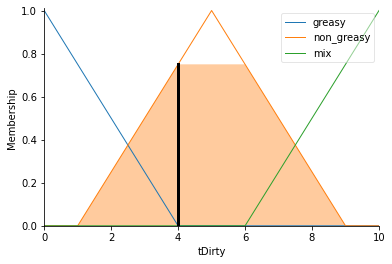

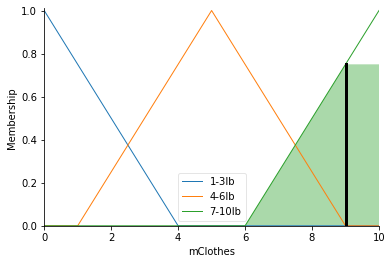

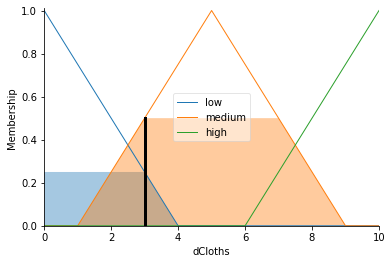

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

"""
Antecedents (INPUTS)
"""
#type clothes as tClothes
tClothes = ctrl.Antecedent(np.arange(0,11,1),'tClothes')
#type of dirt as tDirty
tDirty = ctrl.Antecedent(np.arange(0,11,1), 'tDirty')
#mass of clothes as mClothes
mClothes = ctrl.Antecedent(np.arange(0,11,1), 'mClothes')
#dirtiness of cloths as dCloths
dCloths = ctrl.Antecedent(np.arange(0,11,1), 'dCloths')

"""
Consequent (OUTPUT)
"""
#washing time as wTime
wTime = ctrl.Consequent(np.arange(0,21,1), 'wTime')

"""
membership functions
"""
tClothes['silk'] = fuzz.trimf(tClothes.universe, [0,0,5])
tClothes['cotton'] = fuzz.trimf(tClothes.universe, [4,5,10])

tDirty['greasy'] = fuzz.trimf(tDirty.universe, [0,0,4])
tDirty['non_greasy'] = fuzz.trimf(tDirty.universe, [1,5,9])
tDirty['mix'] = fuzz.trimf(tDirty.universe, [6,10,10])


mClothes['1-3lb'] = fuzz.trimf(mClothes.universe, [0,0,4])
mClothes['4-6lb'] = fuzz.trimf(mClothes.universe, [1,5,9])
mClothes['7-10lb'] = fuzz.trimf(mClothes.universe, [6,10,10])

dCloths['low'] = fuzz.trimf(dCloths.universe, [0,0,4])
dCloths['medium'] = fuzz.trimf(dCloths.universe, [1,5,9])
dCloths['high'] = fuzz.trimf(dCloths.universe, [6,10,10])


wTime['very_short'] = fuzz.trimf(wTime.universe, [0,0,4])
wTime['short'] = fuzz.trimf(wTime.universe, [3,5,8])
wTime['medium'] = fuzz.trimf(wTime.universe, [7,9,12])
wTime['large'] = fuzz.trimf(wTime.universe, [11,13,16])
wTime['very_large'] = fuzz.trimf(wTime.universe, [15,20,20])

#wTime.view()
"""
fuzzy rules
"""

rule1 = ctrl.Rule(tClothes['silk'] & tDirty['greasy'] & mClothes['4-6lb'] & dCloths['medium'], wTime['medium'])
rule2 = ctrl.Rule(tClothes['silk'] & tDirty['non_greasy'] & mClothes['1-3lb'] & dCloths['low'], wTime['very_short'])
rule3 = ctrl.Rule(tClothes['silk'] & tDirty['mix'] & mClothes['7-10lb'] & dCloths['high'], wTime['very_large'])
rule4 = ctrl.Rule(tClothes['silk'] & tDirty['greasy'] & mClothes['1-3lb'] & dCloths['medium'], wTime['short'])
rule5 = ctrl.Rule(tClothes['silk'] & tDirty['mix'] & mClothes['1-3lb'] & dCloths['high'], wTime['large'])
rule6 = ctrl.Rule(tClothes['silk'] & tDirty['mix'] & mClothes['4-6lb'] & dCloths['high'], wTime['very_large'])
rule7 = ctrl.Rule(tClothes['silk'] & tDirty['greasy'] & mClothes['7-10lb'] & dCloths['medium'], wTime['large'])
rule8 = ctrl.Rule(tClothes['silk'] & tDirty['non_greasy'] & mClothes['4-6lb'] & dCloths['low'], wTime['very_short'])
rule9 = ctrl.Rule(tClothes['silk'] & tDirty['non_greasy'] & mClothes['7-10lb'] & dCloths['low'], wTime['short'])
rule10 = ctrl.Rule(tClothes['cotton'] & tDirty['mix'] & mClothes['7-10lb'] & dCloths['high'], wTime['very_large'])
rule11 = ctrl.Rule(tClothes['cotton'] & tDirty['greasy'] & mClothes['7-10lb'] & dCloths['medium'], wTime['very_large'])
rule12 = ctrl.Rule(tClothes['cotton'] & tDirty['non_greasy'] & mClothes['1-3lb'] & dCloths['low'], wTime['very_short'])
rule13 = ctrl.Rule(tClothes['cotton'] & tDirty['mix'] & mClothes['1-3lb'] & dCloths['high'], wTime['short'])
rule14 = ctrl.Rule(tClothes['cotton'] & tDirty['mix'] & mClothes['4-6lb'] & dCloths['high'], wTime['large'])
rule15 = ctrl.Rule(tClothes['cotton'] & tDirty['greasy'] & mClothes['1-3lb'] & dCloths['medium'], wTime['short'])
rule16 = ctrl.Rule(tClothes['cotton'] & tDirty['greasy'] & mClothes['7-10lb'] & dCloths['medium'], wTime['very_large'])
rule17 = ctrl.Rule(tClothes['cotton'] & tDirty['non_greasy'] & mClothes['7-10lb'] & dCloths['low'], wTime['large'])
rule18 = ctrl.Rule(tClothes['cotton'] & tDirty['non_greasy'] & mClothes['4-6lb'] & dCloths['low'], wTime['short'])

#rule10.view()
"""
control system
"""
wTime_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])

washing_time=ctrl.ControlSystemSimulation(wTime_ctrl)
"""
simulation 
"""
washing_time.input['tClothes'] = 5
washing_time.input['tDirty'] = 4
washing_time.input['mClothes'] = 9
washing_time.input['dCloths'] = 3


washing_time.compute()
print("washing time: ",washing_time.output['wTime'])
wTime.view(sim=washing_time)
tClothes.view(sim=washing_time)

tDirty.view(sim=washing_time)
mClothes.view(sim=washing_time)
dCloths.view(sim=washing_time)